#### ***Importing All Required Libraries***

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

In [8]:
data = pd.read_csv("data.csv")
data.head(11)

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],compressor decay,turbine decay
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
5,5,6.175,18,29792.731,2307.404,8828.360,246.278,246.278,800.434,288,676.397,2.501,0.998,13.356,1.030,35.760,0.708,0.95,0.975
6,6,7.148,21,38982.180,2678.086,9132.429,332.077,332.077,854.747,288,699.954,2.963,0.998,15.679,1.035,45.881,0.908,0.95,0.975
7,7,8.206,24,50996.808,3087.561,9318.562,437.989,437.989,952.122,288,741.770,3.576,0.998,18.632,1.040,62.440,1.236,0.95,0.975
8,8,9.300,27,72763.329,3560.395,9778.528,644.905,644.905,1115.797,288,789.094,4.498,0.998,22.811,1.049,92.556,1.832,0.95,0.975
9,9,1.138,3,379.880,1355.375,6683.916,7.915,7.915,464.017,288,550.985,1.100,0.998,5.963,1.019,3.879,0.079,0.95,0.976


In [9]:
data.describe()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],compressor decay,turbine decay
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5966.500000,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,3445.193391,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,0.000000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,2983.250000,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5966.500000,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,8949.750000,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,11933.000000,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


#### **Basic EDA**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     11934 non-null  int64  
 1   Lever position                                            11934 non-null  float64
 2   Ship speed (v)                                            11934 non-null  int64  
 3   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 4   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 8   Hight Pressure (

In [11]:
data.shape

(11934, 19)

In [12]:
data= data.drop("index",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lever position                                            11934 non-null  float64
 1   Ship speed (v)                                            11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                11934 non-null  float64
 3   GT rate of revolutions (GTn) [rpm]                        11934 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]             11934 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]                      11934 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                           11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    11934 non-null  float64
 8   GT Compressor in

In [13]:
data.isnull().sum()

Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flow (mf) [kg/s]                                       0
compress

In [14]:
data.drop_duplicates()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],compressor decay,turbine decay
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [15]:
data.drop_duplicates().shape

(11934, 18)

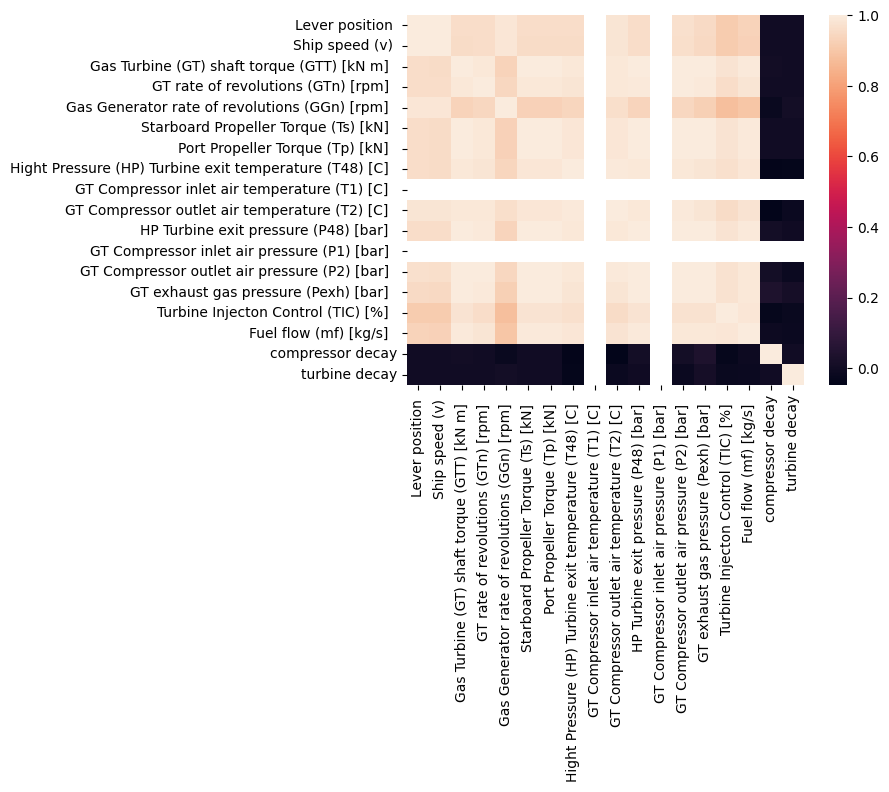

In [16]:
dataplot=sns.heatmap(data.corr())
plt.show()

In [17]:
data.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'compressor decay', 'turbine decay'],
      dtype='object')

In [18]:
data.columns=['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ','compressor decay','turbine decay']

#### *Defining X and Y Variables*

In [19]:
y=data.loc[:,["compressor decay","turbine decay",]]
x=data.drop(['compressor decay','turbine decay'],axis=1)

#### *Scaling And Splitting X And Y*

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = Normalizer().fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(9547, 16) (9547, 2) (2387, 16) (2387, 2)


#### *Applying Model Based On Decision Tree*

In [22]:
model1 = DecisionTreeRegressor(random_state=0)
model1= model1.fit(x_train,y_train)

In [23]:
p=model1.predict(x_test)
print(p)

[[0.998 0.997]
 [0.961 0.987]
 [0.992 0.981]
 ...
 [0.981 0.982]
 [0.984 0.976]
 [0.974 0.991]]


#### *Applying Model Based On Random Forest*

In [24]:
model2=RandomForestRegressor(n_estimators = 300, max_depth = 25)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=300)

In [25]:
p2=model2.predict(x_test)

#### ***Performance Matrix Of Both Models***

In [26]:
# performance metrics of DecisionTreeRegressor
print("Decision Tree Regressor:")
print(f"MSE      = {mean_squared_error(p, y_test):.8f}")
print(f"MAE      = {mean_absolute_error(p, y_test):.5f}")
print(f"MAPE     = {mean_absolute_percentage_error(p, y_test):.5f}")
print(f"r2 Score = {r2_score(p, y_test):.4f}")

# performance metrics of RandomForestRegressor
print("\nRandom Forest Regressor:")
print(f"MSE      = {mean_squared_error(p2, y_test):.8f}")
print(f"MAE      = {mean_absolute_error(p2, y_test):.5f}")
print(f"MAPE     = {mean_absolute_percentage_error(p2, y_test):.5f}")
print(f"r2 Score = {r2_score(p2, y_test):.4f}")

Decision Tree Regressor:
MSE      = 0.00000269
MAE      = 0.00108
MAPE     = 0.00110
r2 Score = 0.9732

Random Forest Regressor:
MSE      = 0.00000076
MAE      = 0.00045
MAPE     = 0.00046
r2 Score = 0.9912


#### *Feature Importances*

In [27]:
feature_importances = model2.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(data.columns[:-2], feature_importances):
    print(f"{feature}: {importance}")


Feature Importances:
Lever position : 0.047067844009304666
Ship speed (v) : 0.045976616168910855
Gas Turbine (GT) shaft torque (GTT) [kN m]  : 0.12274013184463901
GT rate of revolutions (GTn) [rpm]  : 0.011546091044046058
Gas Generator rate of revolutions (GGn) [rpm]  : 0.12289381883269507
Starboard Propeller Torque (Ts) [kN]  : 0.01021303486408777
Port Propeller Torque (Tp) [kN]  : 0.010293459946887719
Hight Pressure (HP) Turbine exit temperature (T48) [C]  : 0.10483325555018758
GT Compressor inlet air temperature (T1) [C]  : 0.0
GT Compressor outlet air temperature (T2) [C]  : 0.1331404351831565
HP Turbine exit pressure (P48) [bar]  : 0.04038102301574101
GT Compressor inlet air pressure (P1) [bar]  : 0.0
GT Compressor outlet air pressure (P2) [bar]  : 0.12335740967904311
GT exhaust gas pressure (Pexh) [bar]  : 0.12555609694290265
Turbine Injecton Control (TIC) [%]  : 0.08477374515790699
Fuel flow (mf) [kg/s]  : 0.017227037760491073


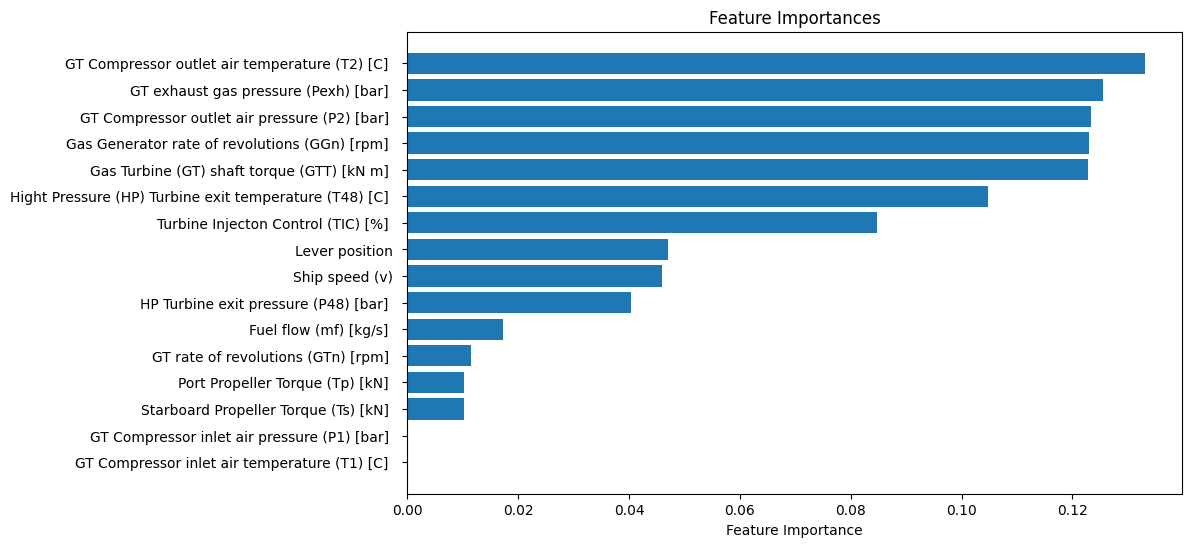

In [28]:
# Extract feature names and importances
feature_names = data.columns[:-2]
importances = model2.feature_importances_

# Sort features by importance in descending order
sorted_indices = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # to display highest importance at the top
plt.show()



Multi-Task Decision Tree Regressor:
MSE      = 0.00000217
MAE      = 0.00078
MAPE     = 0.00080
r2 Score = 0.9785


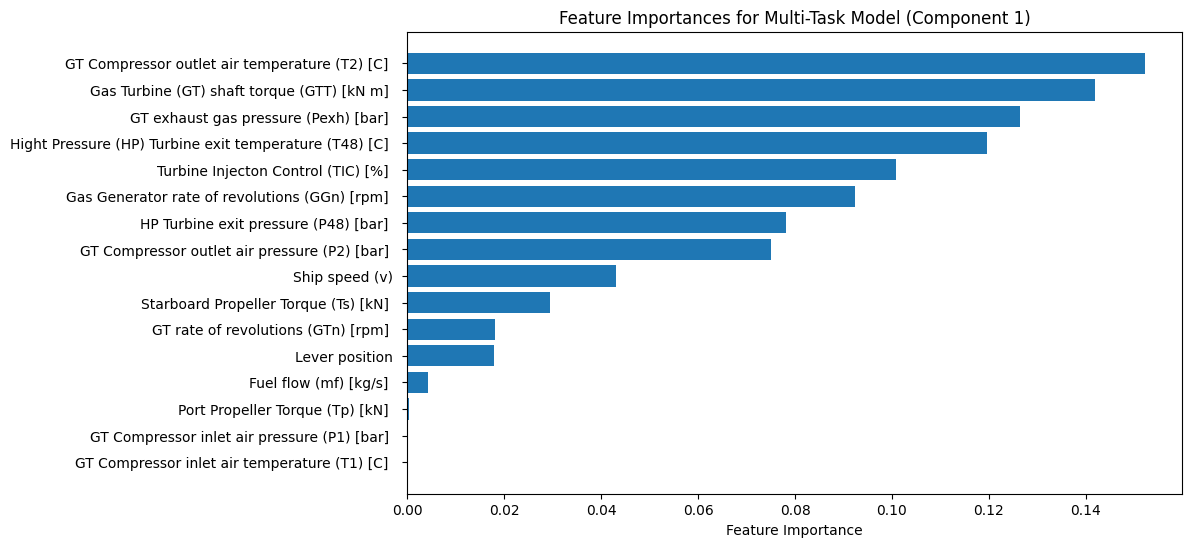

In [29]:
from sklearn.multioutput import MultiOutputRegressor

base_estimator = DecisionTreeRegressor(random_state=0)

multi_task_model = MultiOutputRegressor(base_estimator)

multi_task_model.fit(x_train, y_train)

predictions_multi_task = multi_task_model.predict(x_test)

mse_multi_task = mean_squared_error(predictions_multi_task, y_test)
mae_multi_task = mean_absolute_error(predictions_multi_task, y_test)
mape_multi_task = mean_absolute_percentage_error(predictions_multi_task, y_test)
r2_multi_task = r2_score(predictions_multi_task, y_test)

print("\nMulti-Task Decision Tree Regressor:")
print(f"MSE      = {mse_multi_task:.8f}")
print(f"MAE      = {mae_multi_task:.5f}")
print(f"MAPE     = {mape_multi_task:.5f}")
print(f"r2 Score = {r2_multi_task:.4f}")

feature_importances_multi_task = multi_task_model.estimators_[0].feature_importances_

sorted_indices_multi_task = feature_importances_multi_task.argsort()[::-1]
sorted_features_multi_task = [feature_names[i] for i in sorted_indices_multi_task]
sorted_importances_multi_task = feature_importances_multi_task[sorted_indices_multi_task]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features_multi_task)), sorted_importances_multi_task, align='center')
plt.yticks(range(len(sorted_features_multi_task)), sorted_features_multi_task)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Multi-Task Model (Component 1)')
plt.gca().invert_yaxis()
plt.show()


In [30]:
# Model training
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

# Model evaluation
predictions = model.predict(x_test)
mse = mean_squared_error(predictions, y_test)
mae = mean_absolute_error(predictions, y_test)
mape = mean_absolute_percentage_error(predictions, y_test)
r2 = r2_score(predictions, y_test)

print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.5f}")
print(f"MAPE: {mape:.5f}")
print(f"r2 Score: {r2:.4f}")

# Model predictions
predicted_rul = model.predict(x_test)

# Hyperparameter tuning with Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

rf_model = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(x_test)
rf_mse = mean_squared_error(rf_predictions, y_test)
rf_mae = mean_absolute_error(rf_predictions, y_test)
rf_mape = mean_absolute_percentage_error(rf_predictions, y_test)
rf_r2 = r2_score(rf_predictions, y_test)

print(f"MSE: {rf_mse:.8f}")
print(f"MAE: {rf_mae:.5f}")
print(f"MAPE: {rf_mape:.5f}")
print(f"r2 Score: {rf_r2:.4f}")

MSE: 0.00000269
MAE: 0.00108
MAPE: 0.00110
r2 Score: 0.9732
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 200}
MSE: 0.00000080
MAE: 0.00046
MAPE: 0.00047
r2 Score: 0.9910


In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeRegressor(random_state=0)


bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=10, random_state=0)

bagging_model.fit(x_train, y_train)


predictions_bagging = bagging_model.predict(x_test)

mse_bagging = mean_squared_error(predictions_bagging, y_test)
mae_bagging = mean_absolute_error(predictions_bagging, y_test)
mape_bagging = mean_absolute_percentage_error(predictions_bagging, y_test)
r2_bagging = r2_score(predictions_bagging, y_test)

print("\nBagging Regressor (Decision Trees):")
print(f"MSE      = {mse_bagging:.8f}")
print(f"MAE      = {mae_bagging:.5f}")
print(f"MAPE     = {mape_bagging:.5f}")
print(f"r2 Score = {r2_bagging:.4f}")



c:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging Regressor (Decision Trees):
MSE      = 0.00000108
MAE      = 0.00060
MAPE     = 0.00062
r2 Score = 0.9877


In [32]:
# Combine predictions from MultiOutputRegressor and BaggingRegressor
hybrid_predictions = (predictions_multi_task + predictions_bagging) / 2

# Calculate performance metrics for the hybrid model
mse_hybrid = mean_squared_error(hybrid_predictions, y_test)
mae_hybrid = mean_absolute_error(hybrid_predictions, y_test)
mape_hybrid = mean_absolute_percentage_error(hybrid_predictions, y_test)
r2_hybrid = r2_score(hybrid_predictions, y_test)

# Performance metrics of the hybrid model
print("\nHybrid Model (MultiOutputRegressor + BaggingRegressor):")
print(f"MSE      = {mse_hybrid:.8f}")
print(f"MAE      = {mae_hybrid:.5f}")
print(f"MAPE     = {mape_hybrid:.5f}")
print(f"r2 Score = {r2_hybrid:.4f}")


Hybrid Model (MultiOutputRegressor + BaggingRegressor):
MSE      = 0.00006765
MAE      = 0.00640
MAPE     = 0.00653
r2 Score = -0.0611


In [33]:
import joblib

joblib.dump(model1, 'DecisionTree.pkl')
joblib.dump(model2, 'RandomForest.pkl')
joblib.dump(multi_task_model, 'MultiTaskModel.pkl')
joblib.dump(grid_search, 'GridSearch.pkl')
joblib.dump(bagging_model, 'BaggingRegressor.pkl')


['BaggingRegressor.pkl']